In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
np.random.seed(42)

data = pd.DataFrame({
    'Study_Hours': np.random.uniform(1, 10, 100),
    'Sleep_Hours': np.random.uniform(4, 9, 100),
    'Previous_Score': np.random.uniform(50, 95, 100)
})

In [4]:
# Target variable with some noise
data['Final_Score'] = (
    5 * data['Study_Hours'] +
    2 * data['Sleep_Hours'] +
    0.5 * data['Previous_Score'] +
    np.random.normal(0, 5, 100)
)

In [5]:
print(data.head())

   Study_Hours  Sleep_Hours  Previous_Score  Final_Score
0     4.370861     4.157146       78.891424    69.842168
1     9.556429     7.182052       53.786298    85.781395
2     7.587945     5.571780       57.273292    88.439654
3     6.387926     6.542853       90.434938    93.412403
4     2.404168     8.537832       77.289308    57.615444


In [6]:
print("\nDataset Summary:")
print(data.describe())



Dataset Summary:
       Study_Hours  Sleep_Hours  Previous_Score  Final_Score
count   100.000000   100.000000      100.000000   100.000000
mean      5.231627     6.489159       73.292060    76.131620
std       2.677405     1.465556       13.204181    16.217508
min       1.049699     4.034761       50.227771    40.907921
25%       2.738807     5.210023       62.459594    63.310591
50%       5.177282     6.528124       75.314972    77.784441
75%       7.571828     7.830918       83.856512    88.559424
max       9.881982     8.928252       94.552423   111.542143


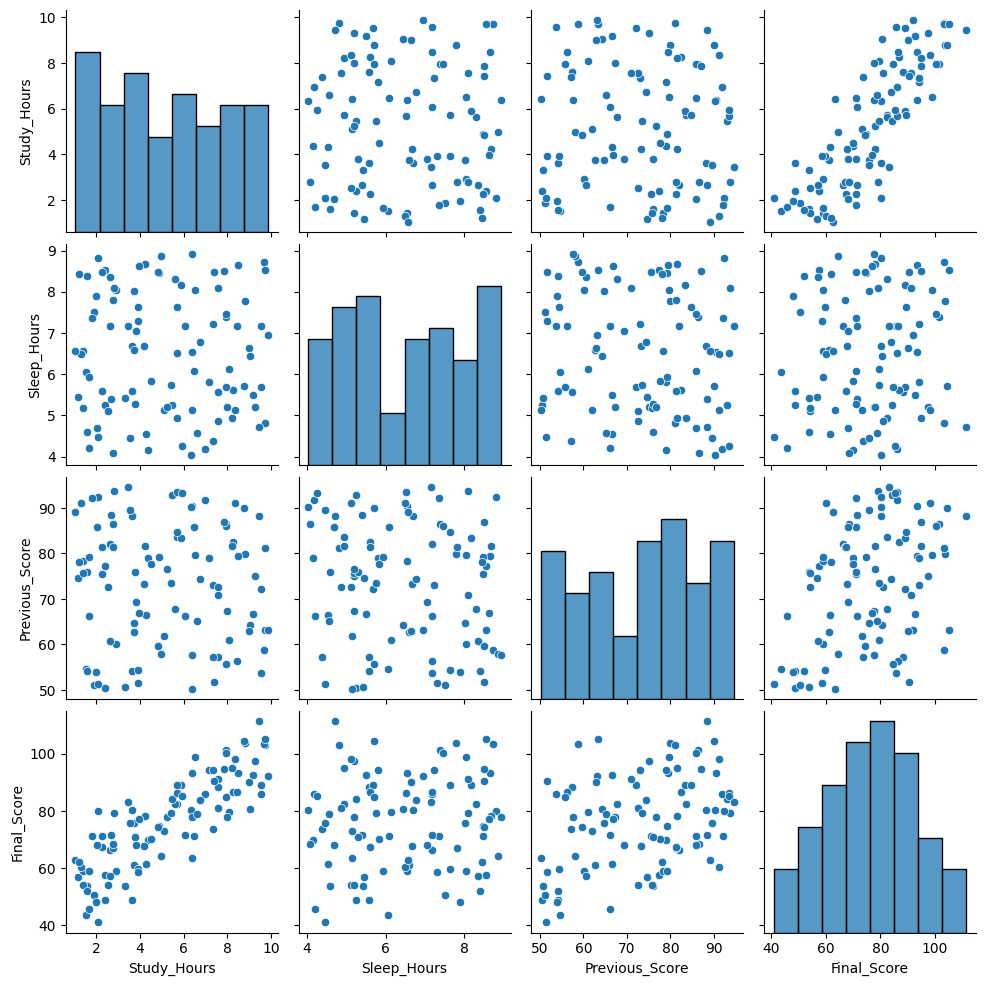

In [7]:
sns.pairplot(data)
plt.savefig("pairplot.png")
plt.show()

In [8]:
X = data[['Study_Hours', 'Sleep_Hours', 'Previous_Score']]
y = data['Final_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [11]:
print("\nModel Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


Model Evaluation:
MAE: 5.344417607547103
MSE: 52.539489029907216
RMSE: 7.248412862820882
R²: 0.8626599171961917


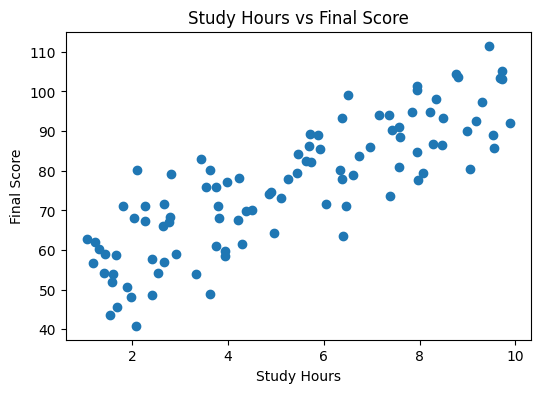

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(data['Study_Hours'], data['Final_Score'])
plt.title("Study Hours vs Final Score")
plt.xlabel("Study Hours")
plt.ylabel("Final Score")
plt.savefig("regression_line_simple.png")
plt.show()

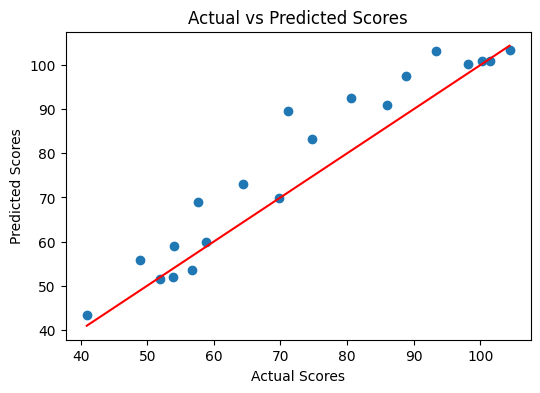

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.savefig("actual_vs_predicted.png")
plt.show()

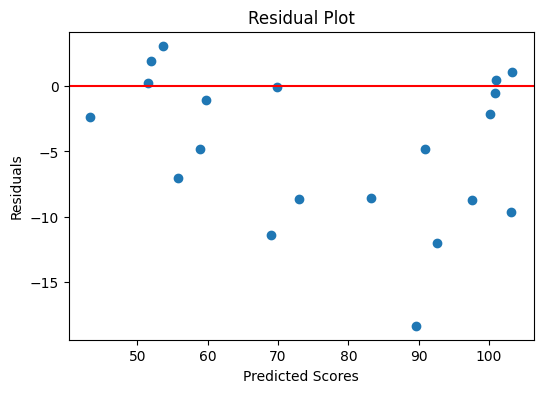

In [14]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Scores")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.savefig("residual_plot.png")
plt.show()

In [15]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

In [16]:
print("\nFeature Importance:")
print(coefficients)


Feature Importance:
          Feature  Coefficient
0     Study_Hours     5.368911
1     Sleep_Hours     2.420770
2  Previous_Score     0.547247
